# Terraria

In [39]:
import nltk

In [40]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [41]:
data = pd.read_csv('/usr/local/share/data/terraria-dataset.csv')

In [42]:
data.head(5)

,id,app_id,app_name,review_text,review_score,review_votes
0,68092,105600,Terraria,You can be a werewolf riding a unicorn while s...,1,0
1,68093,105600,Terraria,You should by 8 copies of this game and go aro...,1,0
2,68094,105600,Terraria,Introduction,1,1
3,68095,105600,Terraria,"If you have friends, this is a great game to p...",1,1
4,68096,105600,Terraria,A Generic Comparison of Terraria versus Minecr...,1,0


In [43]:
data.shape

(84828, 6)

In [44]:
s = data.groupby('app_name').count()
sorted_df = s.sort_values(by='review_text')
print(sorted_df)

             id  app_id  review_text  review_score  review_votes
app_name                                                        
Terraria  84828   84828        84702         84828         84828


In [45]:
data.info

<bound method DataFrame.info of            id  app_id  app_name  \
0       68092  105600  Terraria   
1       68093  105600  Terraria   
2       68094  105600  Terraria   
3       68095  105600  Terraria   
4       68096  105600  Terraria   
...       ...     ...       ...   
84823  152915  105600  Terraria   
84824  152916  105600  Terraria   
84825  152917  105600  Terraria   
84826  152918  105600  Terraria   
84827  152919  105600  Terraria   

                                             review_text  review_score  \
0      You can be a werewolf riding a unicorn while s...             1   
1      You should by 8 copies of this game and go aro...             1   
2                                           Introduction             1   
3      If you have friends, this is a great game to p...             1   
4      A Generic Comparison of Terraria versus Minecr...             1   
...                                                  ...           ...   
84823                        

In [ ]:
data = data.astype(str)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
body = data.review_text
neg, neu, pos, compound = [],[],[],[]
for review in body:
    res = analyzer.polarity_scores(review)
    neg.append(res['neg'])
    neu.append(res['neu'])
    pos.append(res['pos'])
    compound.append(res['compound'])

In [ ]:
data['Negative'] = neg
data['Neutral'] = neu
data['Positive'] = pos
data['Compound'] = compound
data.head(5)

In [79]:
pos_cutoff= .66
neg_cutoff = -0.25

In [81]:
tags = []
for i in range(len(data)):
    if(compound[i] > pos_cutoff):
        tags.append('Positive')
    elif(compound[i] > neg_cutoff):
        tags.append('Neutral')
    else:
        tags.append('Negative')

In [82]:
data['sentiment_pn_compound'] = tags

In [83]:
data.head(5)

,id,app_id,app_name,review_text,review_score,review_votes,Negative,Neutral,Positive,Compound,sentiment_pn_max,sentiment_pn_compound
0,68092,105600,Terraria,You can be a werewolf riding a unicorn while s...,1,0,0.055,0.883,0.062,-0.2031,Negative,Neutral
1,68093,105600,Terraria,You should by 8 copies of this game and go aro...,1,0,0.151,0.732,0.117,-0.1779,Negative,Neutral
2,68094,105600,Terraria,Introduction,1,1,0.000,1.000,0.000,0.0000,Positive,Neutral
3,68095,105600,Terraria,"If you have friends, this is a great game to p...",1,1,0.059,0.658,0.283,0.9608,Positive,Positive
4,68096,105600,Terraria,A Generic Comparison of Terraria versus Minecr...,1,0,0.000,1.000,0.000,0.0000,Positive,Neutral


In [84]:
import matplotlib.pyplot as plt
import matplotlib

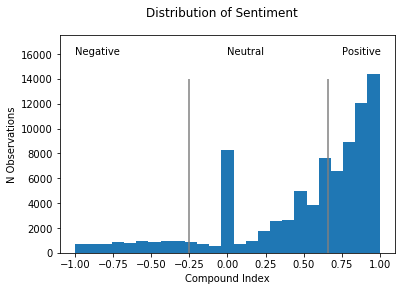

In [85]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
fig.suptitle('Distribution of Sentiment')
ax.hist(data['Compound'],bins=25)
ax.vlines(pos_cutoff,0,14000,color='gray')
ax.vlines(neg_cutoff,0,14000,color='gray')
ax.set_xlabel('Compound Index')
ax.set_ylim(0,17500)
ax.set_ylabel('N Observations')
ax.text(-1,16000,'Negative')
ax.text(0,16000,'Neutral')
ax.text(.75,16000,'Positive')

plt.show()

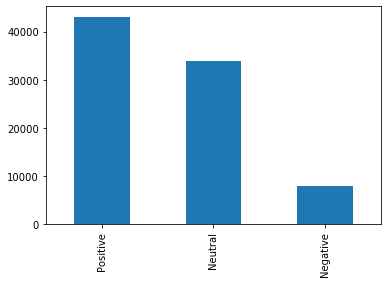

In [87]:
data['sentiment_pn_compound'].value_counts().plot(kind='bar')